![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)

# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Diego Cortez M., Felipe Arias T.

_Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir._

---

## Reglas

- Fecha de entrega: 01/06/2021
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.

---

## 1. Introducción

## 2. Carga de datos Análisis Exploratorio de Datos

### 2.1. Carga de datos

In [ ]:
# !pip install lightgbm
# !pip install xgboost

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

# Funciones de Pipeline y Transformers (SkLearn)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, PowerTransformer, FunctionTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as ltb
import xgboost as xgb

In [5]:
pd.options.display.max_columns = None

In [203]:
df = pd.read_parquet('dataset.pq')
df.head()

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,6.0,11.27,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,4.0,5.42,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,6.0,7.10,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,9.0,1.99,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,15.0,2.58,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0


### 2.2. Análisis exploratorio

In [86]:
print("Número de filas y columnas: ", df.shape)

Número de filas y columnas:  (12500, 22)


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               12500 non-null  object 
 1   age                       12500 non-null  float64
 2   occupation                12500 non-null  object 
 3   annual_income             12500 non-null  float64
 4   monthly_inhand_salary     10584 non-null  float64
 5   num_bank_accounts         12500 non-null  int64  
 6   num_credit_card           12500 non-null  int64  
 7   interest_rate             12500 non-null  int64  
 8   num_of_loan               12500 non-null  float64
 9   delay_from_due_date       12500 non-null  int64  
 10  num_of_delayed_payment    11660 non-null  float64
 11  changed_credit_limit      12246 non-null  float64
 12  num_credit_inquiries      12243 non-null  float64
 13  outstanding_debt          12500 non-null  float64
 14  credit

In [88]:
df.describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_score
count,12500.000000,1.250000e+04,10584.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,11660.00000,12246.000000,12243.000000,12500.000000,12500.000000,11380.000000,12500.000000,11914.000000,1.214500e+04,12500.000000
mean,105.771840,1.616206e+05,4186.634963,16.939920,23.172720,73.213360,3.099440,21.060880,32.93542,10.398582,26.292330,1426.220376,32.349265,18.230404,1488.394291,638.798715,-2.744614e+22,0.288160
std,664.502705,1.297842e+06,3173.690362,114.350815,132.005866,468.682227,65.105277,14.863091,237.43768,6.799253,181.821031,1155.169458,5.156815,8.302078,8561.449910,2049.195193,3.024684e+24,0.452924
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.00000,-6.490000,0.000000,0.230000,20.100770,0.000000,0.000000,0.000000,-3.333333e+26,0.000000
25%,25.000000,1.945333e+04,1622.408646,3.000000,4.000000,8.000000,1.000000,10.000000,9.00000,5.370000,4.000000,566.072500,28.066517,12.000000,31.496968,73.736810,2.701501e+02,0.000000
50%,33.000000,3.757238e+04,3087.595000,6.000000,5.000000,14.000000,3.000000,18.000000,14.00000,9.410000,6.000000,1166.155000,32.418953,18.000000,72.887628,134.093193,3.393885e+02,0.000000
75%,42.000000,7.269021e+04,5967.937500,7.000000,7.000000,20.000000,5.000000,28.000000,18.00000,14.940000,10.000000,1945.962500,36.623650,25.000000,169.634826,261.664256,4.714245e+02,1.000000
max,8678.000000,2.383470e+07,15204.633333,1756.000000,1499.000000,5789.000000,1495.000000,67.000000,4293.00000,36.970000,2554.000000,4998.070000,48.199824,33.000000,81971.000000,10000.000000,1.463792e+03,1.000000


In [116]:
print(f'Cantidad de filas duplicadas: {df.duplicated().sum()}')

Cantidad de filas duplicadas: 0


El archivo `profile.html` muestra un análisis univariado de cada atributo del set de datos. Donde se puede observar lo siguiente:

### Outliers

* Se puede notar que la variable `Delay_from_due_date` y `Num_Bank_Accounts` presentan valores negativos, lo cual no debería ocurrir pues representan el número medio de días desde la fecha de pago y el número de cuentas bancarias respectivamente. Por lo que se filtrarán los valores negativos.

* Además, se puede notar la presencia de outliers, el máximo de `age` es 8678, el máximo de `num_credit_card` es 1499 y el máximo de `num_bank_accounts` es 1756, ¿Cómo es posible que alguien tenga tantas cuentas en el banco?. Veamos la distribución con un boxplot



### Distribución de las variables

* `monthly_inhand_salary`, `outstanding_debt`, `amount_invested_monthly` distribuye Log-normal
* `changed_credit_limit`, `credit_utilization_radio` se asemeja a una distribución Normal
* Mientras que el resto de variables no presenta una distribución conocida debido a lo que se puede apreciar en la forma de la distribución empírica dada por los histogramas del reporte.



#### Tratamiento Outliers

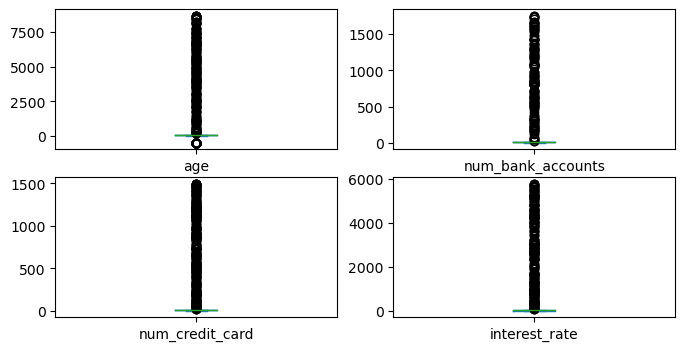

In [90]:
vars = ["age", "num_bank_accounts","num_credit_card","interest_rate"]

_, axs = plt.subplots(2,2,figsize=(8,4))

axs = axs.flatten()
for i, var in enumerate(vars):
    df[var].plot(kind='box', ax=axs[i])

Vemos bastantes outliers por lo que haremos una limpieza.

1. Filtraremos las edades en el rango [18,90] años bajo el supuesto que sólo se ofrecen créditos a mayores de 18 años y a lo más 90 años.
2. Con respecto a las variables `num_bank_accounts`, `num_credit_card` y `interest_rate`, filtraremos valores razonables.

   - `num_bank_accounts` a lo más 10 cuentas. Suponiendo que puede ser porque son varias empresas
   - `num_credit_card` a lo más 10 tarjetas de crédito.
   - `interest_rate` de lo más 30. Es poco razonable una tasa mayor.

In [205]:
df = df[
    (df.delay_from_due_date >= 0) & 
    (df.num_bank_accounts >= 0) &
    (df.age>=18) & 
    (df.age<=90) & 
    (df.num_bank_accounts<=10) & 
    (df.num_credit_card<=10) & 
    (df.interest_rate<=30)
    ].copy()

Si volvemos a ver la distribución a través de un boxplot podemos notar mejor las diferencias

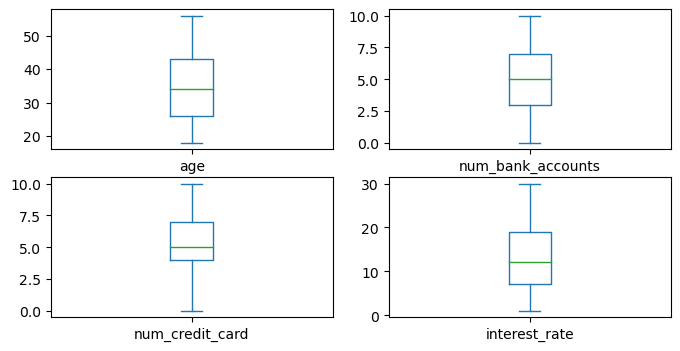

In [206]:
_, axs = plt.subplots(2,2,figsize=(8,4))

axs = axs.flatten()
for i, var in enumerate(vars):
    df[var].plot(kind='box', ax=axs[i])

<AxesSubplot:>

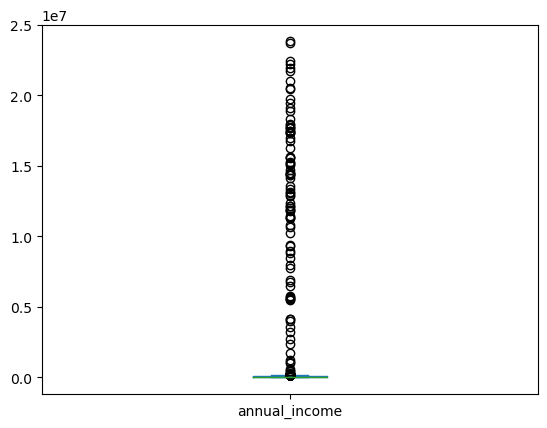

In [207]:
df["annual_income"].plot(kind='box')

Si vemos la variable `annual_income` también presenta mucha dispersión. 

Le aplicaremos logaritmo y filtraremos aquellos valores sobre 4 desviaciones estándar sobre la media.

In [208]:
df["log_annual_income"] = df["annual_income"].apply(np.log)

mean_annual_income = df["log_annual_income"].mean()
std_annual_income = df["log_annual_income"].std()

df = df[(df["log_annual_income"]<mean_annual_income + 4*std_annual_income)].copy()

Si vemos si distribución ahora, se tiene lo siguiente

<AxesSubplot:>

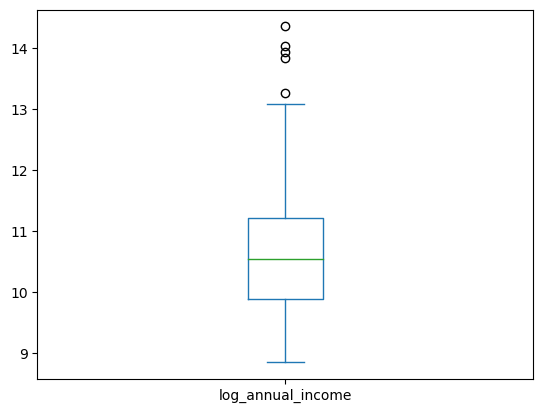

In [209]:
df["log_annual_income"].plot(kind='box')

#### Gráfico correlación

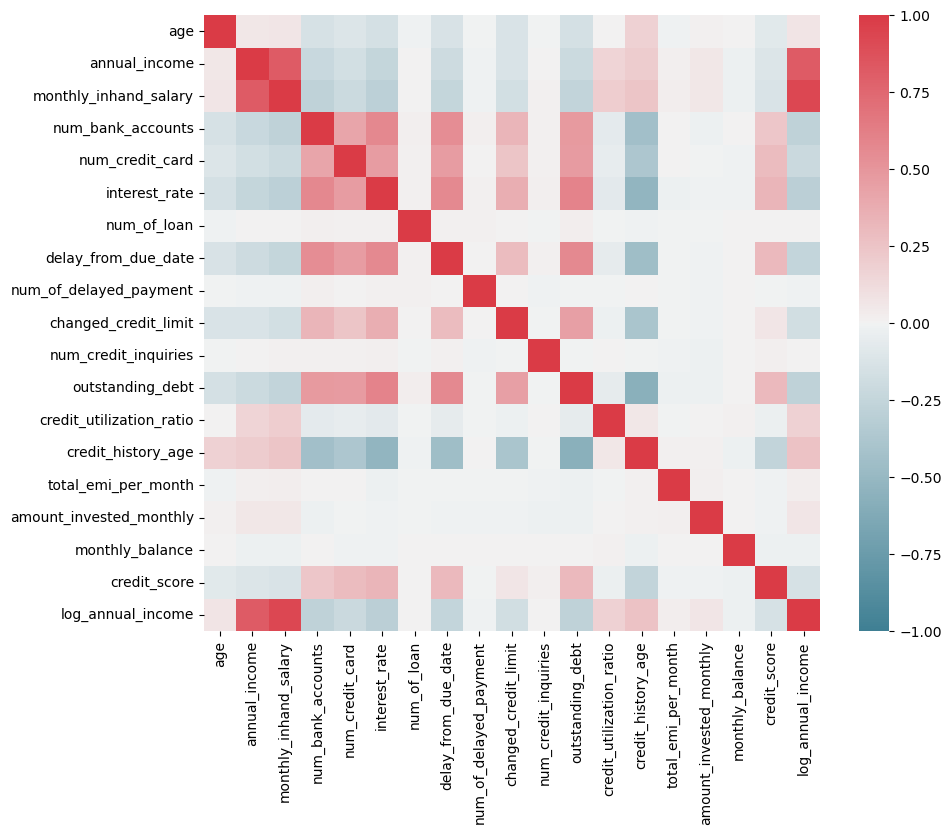

In [193]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, 
    vmax=1.0,
    square=True, 
    ax=ax)
plt.show()

Se puede observar bastante correlación entre el número de cuentas bancarias, tarjetas de crédito y la tasa de interés

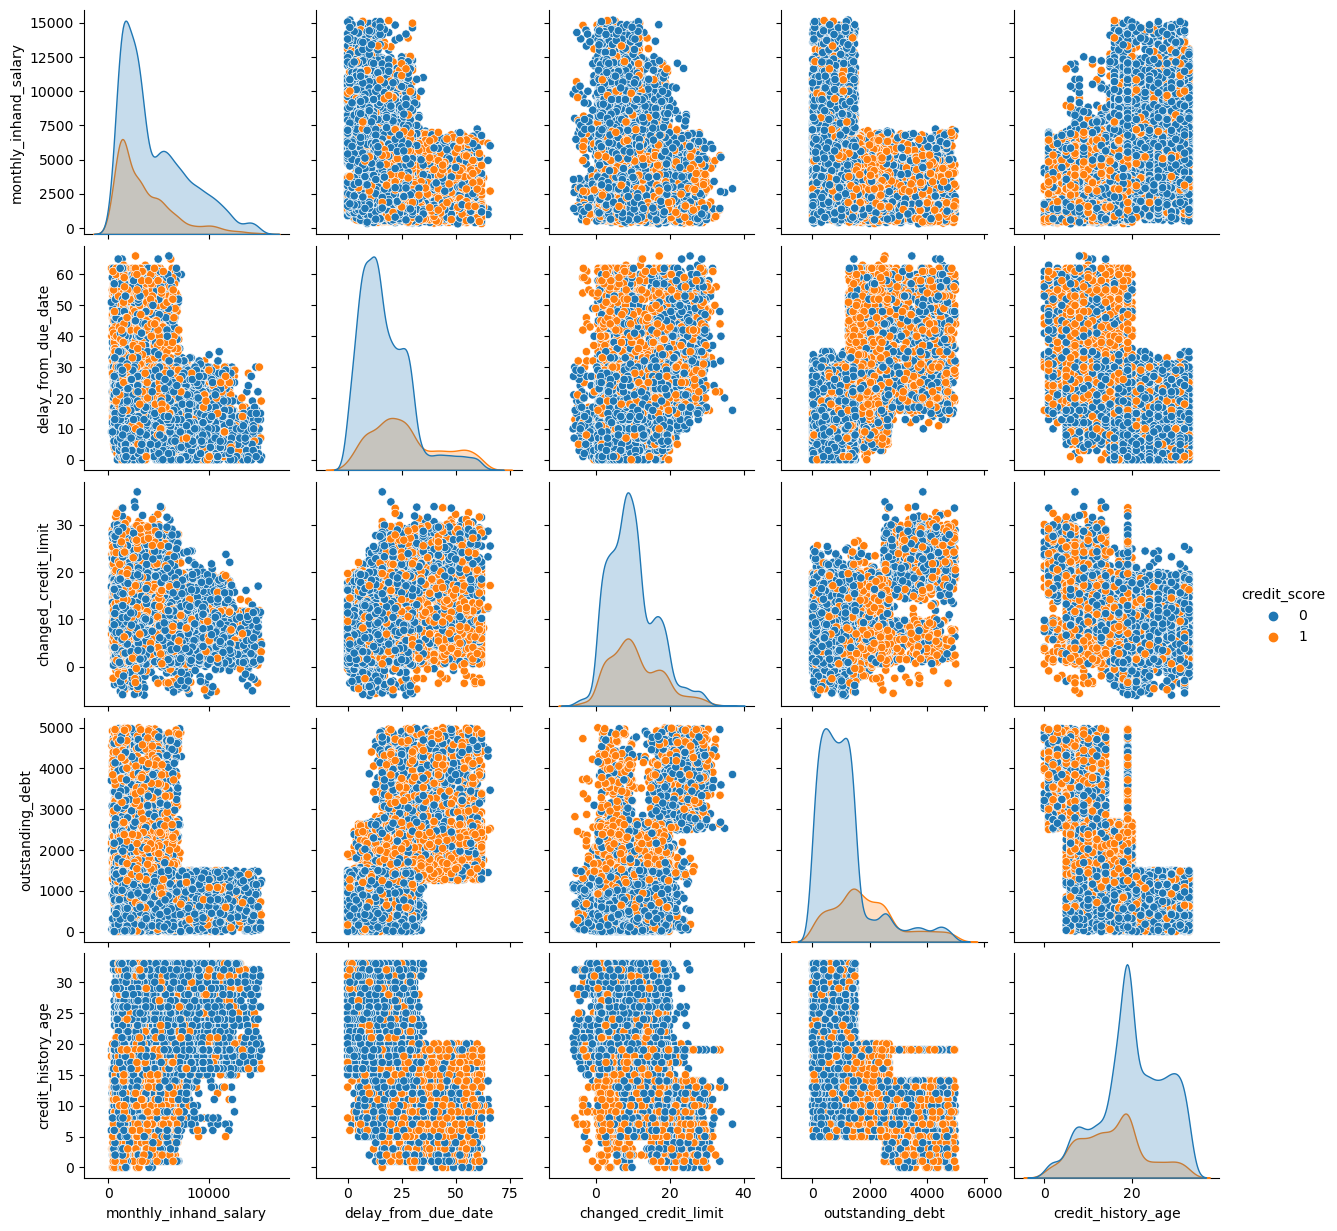

In [195]:
df_pp = df[
    [
        "monthly_inhand_salary", 
        "delay_from_due_date",
        "changed_credit_limit",
        "outstanding_debt",
        "credit_history_age",
        "credit_score"
        ]
    ]

sns.pairplot(df_pp, hue="credit_score")
plt.show()


## 3. Preparación de Datos

### 3.1. Preprocesamiento

Convertir las columnas mal leidas a sus tipos correspondientes (float, str, etc...)

Genere un `ColumnTransformer` que:
  - Preprocese datos categóricos y ordinales.
  - Escale/estandarice datos numéricos.
  - Uitlice `.set_output(transform="pandas")` sobre su `ColumnTransformer` para setear el formato de salida a de las transformaciones a pandas.

In [210]:
# Columnas para transformar con OneHotEncoder
cols_to_oh = [
    'occupation',
    'payment_of_min_amount',
    'payment_behaviour'
]

cols_minmax = [
    'age',
    'log_annual_income',
    'monthly_inhand_salary',
    'num_bank_accounts',
    'num_credit_card',
    'interest_rate',
    'num_of_loan',
    'num_of_delayed_payment',
    'num_credit_inquiries',
    'outstanding_debt',
    'credit_history_age',
    'total_emi_per_month',
    'amount_invested_monthly',
    'monthly_balance'
]

cols_standard = [
    'delay_from_due_date',
    'changed_credit_limit',
    'credit_utilization_ratio'
]

# Generamos el transformer de preprocesamiento
preprocessing_transformer = ColumnTransformer(
    transformers = [
        ('OneHotEncoder', OneHotEncoder(sparse_output=False), cols_to_oh),
        ('StandardScaler', StandardScaler(), cols_standard),
        ('MinMax', MinMaxScaler(), cols_minmax)
    ],
    remainder='passthrough'
).set_output(transform="pandas")

# Generamos el Pipeline que aplicará las transformaciones de preprocesamiento
# pipeline = Pipeline(
#     steps=[
#         preprocessing_transformer
#     ]
# ).set_output(transform="pandas")

In [211]:
df_preprocesado = preprocessing_transformer.fit_transform(df)
df_preprocesado

,OneHotEncoder__occupation_Accountant,OneHotEncoder__occupation_Architect,OneHotEncoder__occupation_Developer,OneHotEncoder__occupation_Doctor,OneHotEncoder__occupation_Engineer,OneHotEncoder__occupation_Entrepreneur,OneHotEncoder__occupation_Journalist,OneHotEncoder__occupation_Lawyer,OneHotEncoder__occupation_Manager,OneHotEncoder__occupation_Mechanic,OneHotEncoder__occupation_Media_Manager,OneHotEncoder__occupation_Musician,OneHotEncoder__occupation_Scientist,OneHotEncoder__occupation_Teacher,OneHotEncoder__occupation_Writer,OneHotEncoder__occupation________,OneHotEncoder__payment_of_min_amount_NM,OneHotEncoder__payment_of_min_amount_No,OneHotEncoder__payment_of_min_amount_Yes,OneHotEncoder__payment_behaviour_!@9#%8,OneHotEncoder__payment_behaviour_High_spent_Large_value_payments,OneHotEncoder__payment_behaviour_High_spent_Medium_value_payments,OneHotEncoder__payment_behaviour_High_spent_Small_value_payments,OneHotEncoder__payment_behaviour_Low_spent_Large_value_payments,OneHotEncoder__payment_behaviour_Low_spent_Medium_value_payments,OneHotEncoder__payment_behaviour_Low_spent_Small_value_payments,StandardScaler__delay_from_due_date,StandardScaler__changed_credit_limit,StandardScaler__credit_utilization_ratio,MinMax__age,MinMax__log_annual_income,MinMax__monthly_inhand_salary,MinMax__num_bank_accounts,MinMax__num_credit_card,MinMax__interest_rate,MinMax__num_of_loan,MinMax__num_of_delayed_payment,MinMax__num_credit_inquiries,MinMax__outstanding_debt,MinMax__credit_history_age,MinMax__total_emi_per_month,MinMax__amount_invested_monthly,MinMax__monthly_balance,remainder__customer_id,remainder__annual_income,remainder__credit_score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.203996,0.185364,-1.638118,0.131579,0.182284,0.102087,0.3,0.4,0.068966,0.065204,0.002095,0.001566,0.162051,NaN,0.000605,0.002479,1.0,CUS_0xd40,19114.12,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.203996,-0.698928,0.099265,0.263158,0.291358,0.183501,0.2,0.4,0.172414,0.063323,0.001629,0.000783,0.121036,0.818182,0.000230,0.021890,1.0,CUS_0x21b1,34847.84,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.846903,-0.444978,1.149583,0.421053,0.547984,0.797502,0.1,0.5,0.241379,0.064577,0.002095,0.001175,0.260719,0.545455,0.003014,1.000000,1.0,CUS_0x2dbc,143162.64,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.132578,-1.217411,-0.982025,0.973684,0.268282,0.154946,0.2,0.5,0.103448,0.000000,0.002793,0.001566,0.126525,0.515152,0.000200,0.012562,1.0,CUS_0xb891,30689.89,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.346833,-1.128226,-1.265717,0.078947,0.294969,0.171107,0.7,0.5,0.137931,0.000000,0.004190,0.001566,0.188844,0.939394,0.000000,0.018133,1.0,CUS_0x1cdb,35547.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.775484,-0.747300,0.636453,0.026316,0.329129,0.212380,0.0,0.4,0.172414,0.063323,NaN,0.000392,0.215985,0.848485,0.000427,0.011518,NaN,CUS_0x372c,42903.79,0
12496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.346833,-0.658115,1.697360,0.710526,0.157548,NaN,0.1,0.1,0.137931,0.065204,0.000698,0.003132,0.179498,NaN,0.000502,0.007081,NaN,CUS_0xf16,16680.35,0
12497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.918322,-0.704975,1.328383,0.842105,0.303163,0.187462,0.1,0.4,0.137931,0.064577,0.002793,0.001175,0.124160,0.909091,0.001028,0.004294,NaN,CUS_0xaf61,37188.10,0
12498,0.0,1.0,0

### 3.2. Holdout

Para efectos del modelo de clasificación, se elimina el id del cliente, ya que no aporta a la generalización del algoritmo.

In [212]:
df.drop(columns=["customer_id"], inplace=True)

Se eliminan las filas que tienen valores nulos en ciertas columnas (más detalles en Parte 3.3).

In [ ]:
# df.dropna(subset = ['changed_credit_limit', 'num_credit_inquiries', 'amount_invested_monthly', 'monthly_balance'], inplace=True)

In [213]:
y = df['credit_score']
X = df.drop(columns=['credit_score'])

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### 3.3. Datos nulos

In [221]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False).head(8).mul(100).round(2)

monthly_inhand_salary       15.17
credit_history_age           8.97
num_of_delayed_payment       6.68
amount_invested_monthly      4.37
monthly_balance              2.87
num_credit_inquiries         2.12
changed_credit_limit         2.02
credit_utilization_ratio     0.00
dtype: float64

De acuerdo a los resultados del análisis exploratorio (Sección 2.2), las columnas que presentan datos nulos con su respectivo porcentaje son:

| Atributo                | Porcentaje de datos nulos |
|-------------------------|---------------------------|
| monthly_inhand_salary   |   15.17                   |
| credit_history_age      |    8.97                   |
| num_of_delayed_payment  |    6.68                   |
| amount_invested_monthly |    4.37                   |
| monthly_balance         |    2.87                   |
| num_credit_inquiries    |    2.12                   |
| changed_credit_limit    |    2.02                   |

Por otro lado, se obtiene la cantidad de filas que contienen al menos un valor nulo.

In [224]:
df.isna().any(axis=1).sum()/ df.shape[0]

0.3597409068261086

Además, se genera una visualización Missigno sobre el dataframe.

<AxesSubplot:>

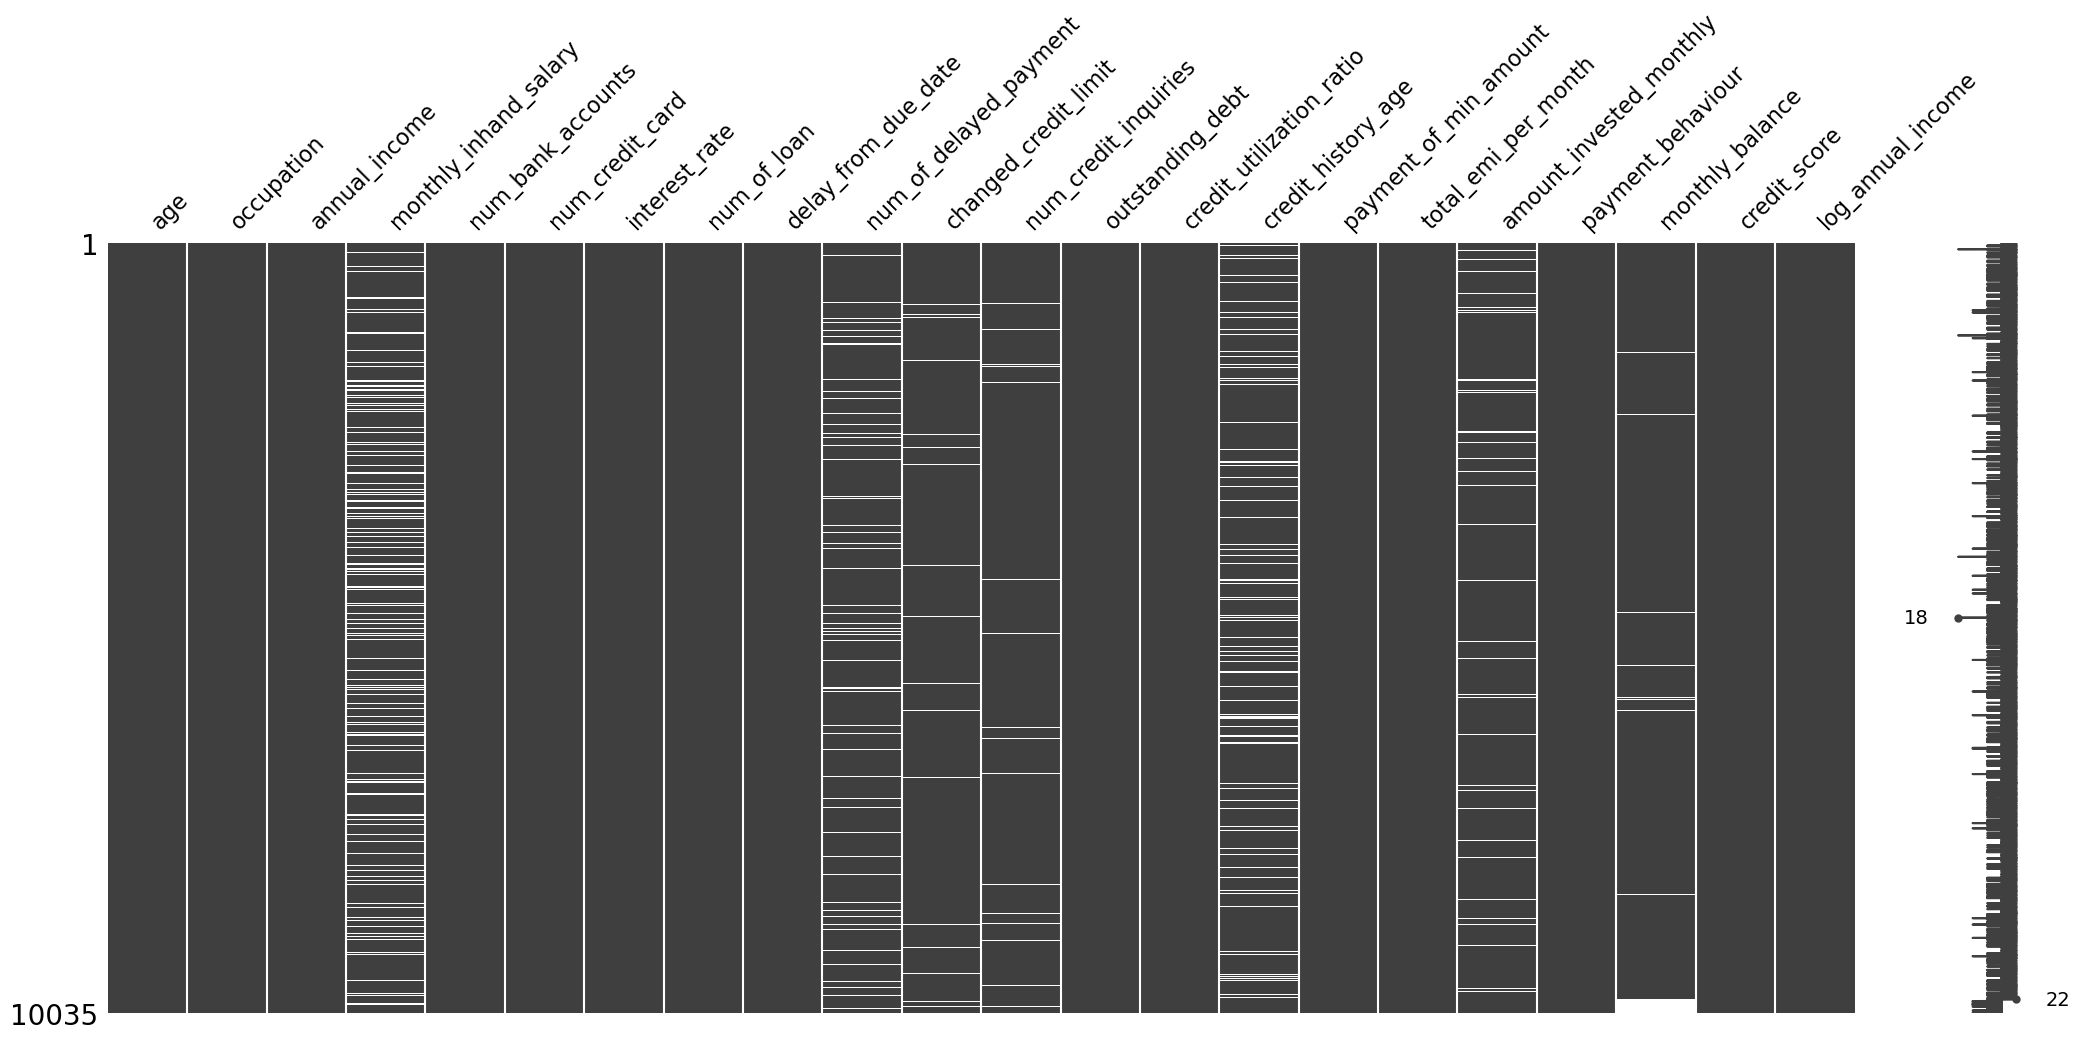

In [225]:
%matplotlib inline

msno.matrix(df)

A continuación, se detallan las acciones realizadas para cada atributo que presenta datos nulos:

* `monthly_inhand_salary`: Es una variable numérica continua que representa el salario mensual de una persona. Por lo tanto, esto podría aproximarse al ingreso anual (annual_income) dividido por 12.

<AxesSubplot:>

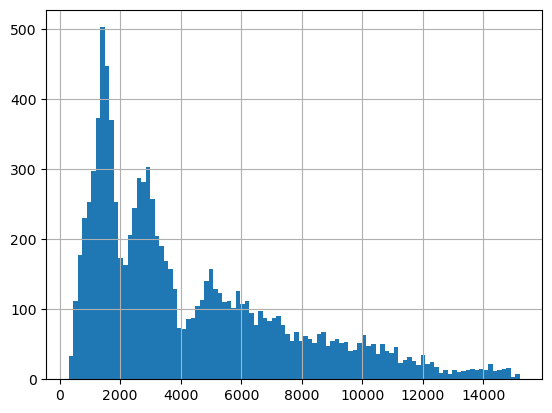

In [234]:
df['monthly_inhand_salary'].hist(bins = 100)

In [235]:
df['monthly_inhand_salary'] = df['monthly_inhand_salary'].fillna(df['annual_income']/12)
# df['monthly_inhand_salary'].hist(bins = 100)

* `num_of_delayed_payment`: Es una variable numérica continua que representa el promedio de la cantidad de pagos retrasados por el cliente. Y presenta muchos outliers, así que los datos nulos son reemplazados por la mediana.

<AxesSubplot:>

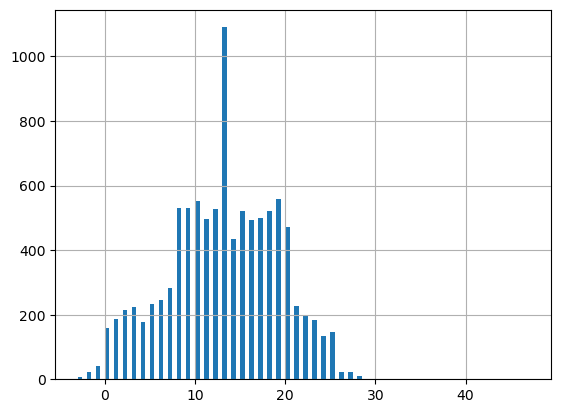

In [236]:
df.loc[df['num_of_delayed_payment'] < 100, 'num_of_delayed_payment'].hist(bins=100)

In [237]:
df['num_of_delayed_payment'] = df['num_of_delayed_payment'].fillna(df['num_of_delayed_payment'].median())

<AxesSubplot:>

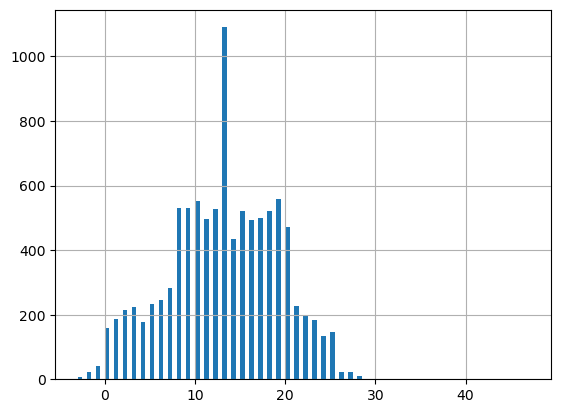

In [238]:
df.loc[df['num_of_delayed_payment'] < 100, 'num_of_delayed_payment'].hist(bins=100)

* `changed_credit_limit`, `num_credit_inquiries`, `amount_invested_monthly` y `monthly_balance`: Tienen menos del 3% de datos nulos, por lo que se imputarán con la mediana.

In [246]:
df["changed_credit_limit"] = df["changed_credit_limit"].fillna(df["changed_credit_limit"].median())
df["num_credit_inquiries"] = df["num_credit_inquiries"].fillna(df["num_credit_inquiries"].median())
df["amount_invested_monthly"] = df["amount_invested_monthly"].fillna(df["amount_invested_monthly"].median())
df["monthly_balance"] = df["monthly_balance"].fillna(df["monthly_balance"].median())


* `credit_history_age`: Es una variable numérica continua que representa la edad de la historia de crédito de la persona. Los datos nulos se reemplazan con la media.

<AxesSubplot:>

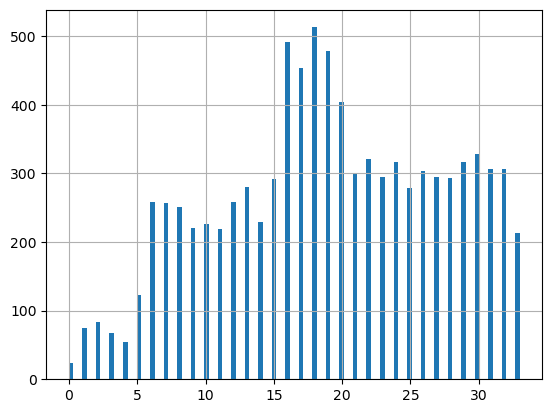

In [239]:
df['credit_history_age'].hist(bins = 100)

In [244]:
df['credit_history_age'] = df['credit_history_age'].fillna(df['credit_history_age'].mean())

<AxesSubplot:>

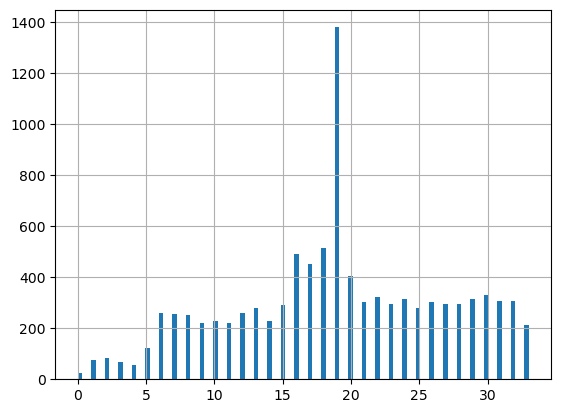

In [241]:
df['credit_history_age'].hist(bins = 100)

In [248]:
(df.isna().sum()/df.shape[0]).sum()

0.0

Ya no tenemos nulos 😎

In [152]:
def tranform_nan(dataframe):

    df_result = dataframe.copy()

    # imputacion sobre monthly_inhand_salary
    df_result['monthly_inhand_salary'] = df_result['monthly_inhand_salary'].fillna(df_result['annual_income']/12)

    # imputacion num_of_delayed_payment
    df_result['num_of_delayed_payment'] = df_result['num_of_delayed_payment'].fillna(df_result['num_of_delayed_payment'].median())

    # imputacion credit_history_age
    df_result['credit_history_age'] = df_result['credit_history_age'].fillna(df_result['credit_history_age'].mean())

    # se eliminan el resto de filas con nulos
    # df_result.dropna(inplace=True)

    return df_result

In [255]:
y = df['credit_score']
X = df.drop(columns=['credit_score'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## 4. Baseline
Se generan varios Pipeline que utilizan diferentes tipos de modelos de clasificación.

In [264]:
rs = 666

pipe_dummy = Pipeline([
    ('transform_nan', FunctionTransformer(tranform_nan)),
    ('preprocesamiento', preprocessing_transformer),
    ('clf', DummyClassifier(strategy='stratified', random_state=rs))
])

pipe_logit = Pipeline([
    ('transform_nan', FunctionTransformer(tranform_nan)),
    ('preprocesamiento', preprocessing_transformer),
    ('clf', LogisticRegression(random_state=rs))
])

pipe_knn = Pipeline([
    ('transform_nan', FunctionTransformer(tranform_nan)),
    ('preprocesamiento', preprocessing_transformer),
    ('clf', KNeighborsClassifier())
])

pipe_dtc = Pipeline([
    ('transform_nan', FunctionTransformer(tranform_nan)),
    ('preprocesamiento', preprocessing_transformer),
    ('clf', DecisionTreeClassifier(random_state=rs))
])

pipe_svc = Pipeline([
    ('transform_nan', FunctionTransformer(tranform_nan)),
    ('preprocesamiento', preprocessing_transformer),
    ('clf', SVC(random_state=rs))
])

pipe_rfc = Pipeline([
    ('transform_nan', FunctionTransformer(tranform_nan)),
    ('preprocesamiento', preprocessing_transformer),
    ('clf', RandomForestClassifier(random_state=rs))
])

pipe_lgbm = Pipeline([
    ('preprocesamiento', preprocessing_transformer),
    ('clf', ltb.LGBMClassifier(random_state=rs))
])

pipe_xgb = Pipeline([
    ('transform_nan', FunctionTransformer(tranform_nan)),
    ('preprocesamiento', preprocessing_transformer),
    ('clf', xgb.XGBClassifier(random_state=rs))
])

In [265]:
# Ajustes y predicciones
pipe_dummy.fit(X_train, y_train)
y_pred_dummy = pipe_dummy.predict(X_test)

pipe_logit.fit(X_train, y_train)
y_pred_logit = pipe_logit.predict(X_test)

# pipe_knn.fit(X_train, y_train)
# y_pred_knn = pipe_knn.predict(X_test)

pipe_dtc.fit(X_train, y_train)
y_pred_dtc = pipe_dtc.predict(X_test)

pipe_svc.fit(X_train, y_train)
y_pred_svc = pipe_svc.predict(X_test)

pipe_rfc.fit(X_train, y_train)
y_pred_rfc = pipe_rfc.predict(X_test)

pipe_lgbm.fit(X_train, y_train)
y_pred_lgbm = pipe_lgbm.predict(X_test)

pipe_xgb.fit(X_train, y_train)
y_pred_xgb = pipe_xgb.predict(X_test)

[LightGBM] [Info] Number of positive: 2124, number of negative: 5904
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2421
[LightGBM] [Info] Number of data points in the train set: 8028, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264574 -> initscore=-1.022329
[LightGBM] [Info] Start training from score -1.022329


In [268]:
# Diccionario de metricas
metric_dict = {}

# Impresión de resultados
print('Dummy:\n')
print(classification_report(y_test, y_pred_dummy))
recall_dummy = recall_score(y_test, y_pred_dummy, average=None)[1]
metric_dict['Dummy'] = recall_dummy

print('\nLogistic Regression:\n')
print(classification_report(y_test, y_pred_logit))
recall_logit = recall_score(y_test, y_pred_logit, average=None)[1]
metric_dict["Logit"] = recall_logit

print('\nDecision Tree:\n')
print(classification_report(y_test, y_pred_dtc))
recall_dtc = recall_score(y_test, y_pred_dtc, average=None)[1]
metric_dict["DTC"] = recall_dtc

print('\nSupport Vector Machines:\n')
print(classification_report(y_test, y_pred_svc))
recall_svc = recall_score(y_test, y_pred_svc, average=None)[1]
metric_dict["SVC"] = recall_svc

print('\nRandom Forest:\n')
print(classification_report(y_test, y_pred_rfc))
recall_rfc = recall_score(y_test, y_pred_rfc, average=None)[1]
metric_dict["RFC"] = recall_rfc

print('\nLGBM:\n')
print(classification_report(y_test, y_pred_lgbm))
recall_lgbm = recall_score(y_test, y_pred_lgbm, average=None)[1]
metric_dict["LGBM"] = recall_lgbm

print('\nXGBoost:\n')
print(classification_report(y_test, y_pred_xgb))
recall_xgb = recall_score(y_test, y_pred_xgb, average=None)[1]
metric_dict["XGB"] = recall_xgb

Dummy:

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1476
           1       0.28      0.28      0.28       531

    accuracy                           0.62      2007
   macro avg       0.51      0.51      0.51      2007
weighted avg       0.62      0.62      0.62      2007


Logistic Regression:

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1476
           1       0.00      0.00      0.00       531

    accuracy                           0.74      2007
   macro avg       0.37      0.50      0.42      2007
weighted avg       0.54      0.74      0.62      2007


Decision Tree:

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1476
           1       0.46      0.48      0.47       531

    accuracy                           0.71      2007
   macro avg       0.63      0.64      0.64      2007
weighted avg       0.72   

e:\Sebas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Sebas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Sebas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Sebas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

In [269]:
metric_df = pd.DataFrame(metric_dict.items(), columns=['Modelo', 'Recall'])
metric_df.sort_values(by=["Recall"], ascending=False)

,Modelo,Recall
5,LGBM,0.485876
2,DTC,0.482109
4,RFC,0.463277
6,XGB,0.457627
0,Dummy,0.278719
1,Logit,0.000000
3,SVC,0.000000


    Se puede observar que sólo Logit y SVC no le logran ganar al clasificador Dummy respecto al Recall, lo cual no deja de ser interesnate.

    Se puede observar que el mejor modelo que da respecto a la métrica evaluada es el LightGBM.

    Se cree que es mejor porque combina varios modelos débiles de manera secuencia e intuitivamente va aprendiendo de los errores del predecesor, es bastante más robusto que un Decision Tree que sólo realiza cortes en las variables.

    Se probará para experimentar con el mejor modelo, LightGBM

### 5. Optimización del Modelo

Se trabajará con LightGBM y utilizaremos la librería Optuna

In [ ]:
# !pip install optuna

In [ ]:
def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    # Entrenar el modelo con los hiperparámetros sugeridos por Optuna
    model = lgb.LGBMClassifier(**param)
    model.fit(X_train, y_train)

    # Calcular la puntuación AUC-ROC en el conjunto de prueba
    y_pred = model.predict_proba(X_test)[:, 1]
    score = roc_auc_score(y_test, y_pred)

    return score


In [ ]:
optuna_search = optuna.integration.OptunaSearchCV(clf, param_distributions)
optuna_search.fit(X, y)
y_pred = optuna_search.predict(X)